# Beauty in Numbers: Predicting Sephora Product Ratings with Machine Learning

### Significance of this project :
The significance of this data science project can be seen in different ways. Firstly, by analyzing Sephora data, we can gain insights into consumer preferences and purchase patterns. This information can be used by Sephora to improve their product offerings, marketing strategies, and customer service.

Secondly, by building a model to predict ratings, we can help Sephora identify products that are likely to perform well and those that may need improvement. This can help Sephora make data-driven decisions about their product development and marketing efforts.

Lastly, this project demonstrates the use of various machine learning techniques such as data preprocessing, feature engineering, and model selection, which can be applied to other domains and industries to solve similar problems. I also demo how scikitlearn pipelines can be used here.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-products-available-on-sephora-website/sephora_website_dataset.csv


### Imports

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import dataset

In [4]:
# Import dataset
data = pd.read_csv('/kaggle/input/all-products-available-on-sephora-website/sephora_website_dataset.csv')


### Set display option

In [5]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('max_colwidth', None)

### Explore dataset

In [6]:
# Check the first few rows of the dataset
data.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [7]:
# Check the shape of the dataset
print(data.shape)

# Check the data types of the variables
print(data.dtypes)

# Check the number of missing values in the dataset
print(data.isnull().sum())

(9168, 21)
id                          int64
brand                      object
category                   object
name                       object
size                       object
rating                    float64
number_of_reviews           int64
love                        int64
price                     float64
value_price               float64
URL                        object
MarketingFlags               bool
MarketingFlags_content     object
options                    object
details                    object
how_to_use                 object
ingredients                object
online_only                 int64
exclusive                   int64
limited_edition             int64
limited_time_offer          int64
dtype: object
id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_pri

## Explore Relations between variables

### 1. Distribution of product ratings
We will create a histogram or density plot of the "rating" column to see the distribution of ratings across all products. 
This will give us an idea of how many products have high ratings versus low ratings.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


Text(0.5, 1.0, 'Distribution of product ratings')

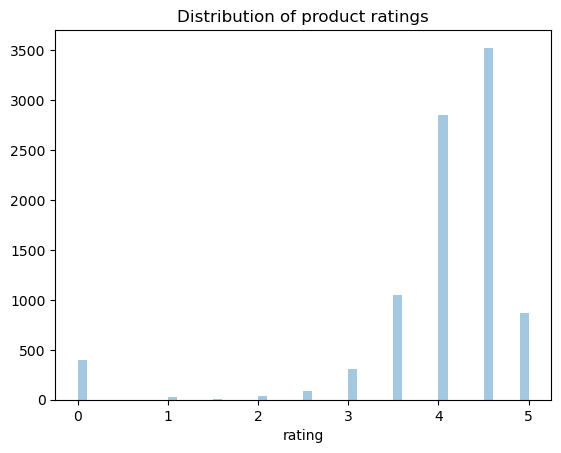

In [8]:
# Plot the histogram thanks to the distplot function
sns.distplot( a=data["rating"], hist=True, kde=False, rug=False ).set_title('Distribution of product ratings')


### 2. Relationship between ratings and number of reviews
We will create a scatter plot of "rating" versus "numberofreviews" to see if there is a correlation between these two variables. 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  


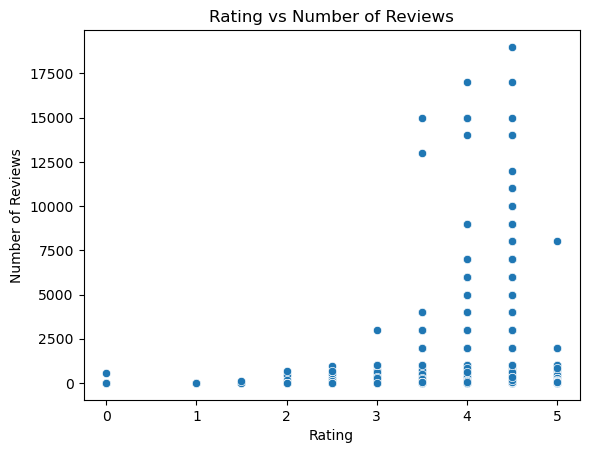

In [9]:
# Create the scatter plot using seaborn
sns.scatterplot(x='rating', y='number_of_reviews', data=data, palette='Blues')
sns.set_style("whitegrid")

# Customize the plot
plt.title('Rating vs Number of Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()

Products with more reviews have higher rating. Our assumption is that customers review and rate products they liked/disliked equally.

### 3. Distribution of product prices
We create a histogram or density plot of the "price" column to see the distribution of prices across all products. 

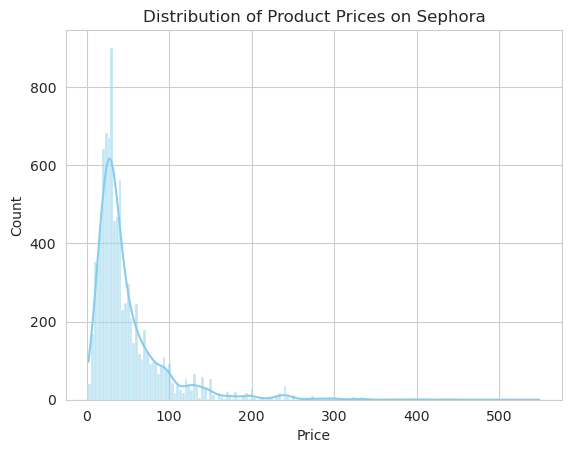

In [10]:
# Create the histogram using seaborn
sns.histplot(data=data, x="price", kde=True, color="skyblue")

# Customize the plot
plt.title('Distribution of Product Prices on Sephora')
plt.xlabel('Price')
plt.ylabel('Count')
sns.set_style("whitegrid")

# Show the plot
plt.show()


This gives us an idea of range of products. Majority of the products cost less than $100.

### 4. Relationship between price and love
We create a scatter plot of "price" versus "love" to see if there is a correlation between these two variables. 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  


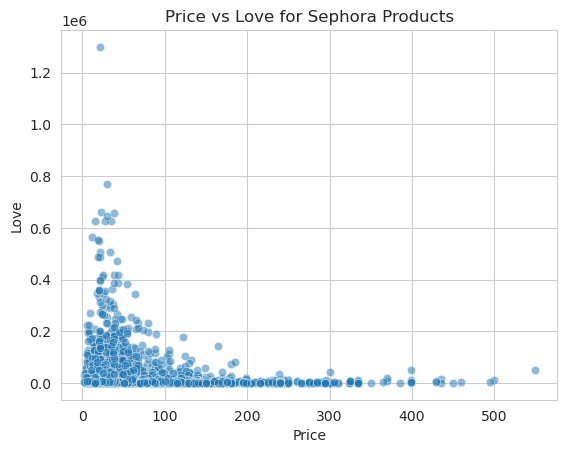

In [11]:
# Create the scatter plot using seaborn
sns.scatterplot(x='price', y='love', data=data, palette='husl', alpha=0.5)

# Customize the plot
plt.title('Price vs Love for Sephora Products')
plt.xlabel('Price')
plt.ylabel('Love')
sns.set_style("whitegrid")

# Show the plot
plt.show()

Products that lie between the range of less expensive are more loved.

### 5. Distribution of product categories
We create a bar chart or pie chart of the "category" column to see the distribution of products across different categories.

In [12]:
# Count the number of products in each category
data['category'].nunique()

143

There are more than 10 categories, it may not be practical to create a bar chart or pie chart of all the categories. In this case, we can consider grouping the categories into broader categories or creating a chart for the top N most frequent categories.

In [13]:
# Define the mapping from categories to broader categories
category_map = {
    'Makeup': ['Eye Palettes','Highlighter', 'Cheek Palettes', 'Lipstick',  'Face Primer',
               'Color Correct', 'Tinted Moisturizer',  'Concealer', 'BB & CC Cream',
               'Eyebrow', 'Mascara', 'Foundation','Setting Spray & Powder', 'Contour',
               'Eyeshadow', 'Lip Gloss',
       'False Eyelashes', 'Bronzer', 'Eyeliner', 'Eye Primer', 'Eye Sets', 'Eye Cream', 'Sunscreen',
       'Blush', 'Liquid Lipstick', 'Makeup','Face Sets', 'Lip Liner',  'Lip Stain', 'Lip Sets', 
              'Blotting Papers', 'Makeup Removers', 'Lip Plumper', 'For Face', 
               'BB & CC Creams','Makeup Palettes', 'Lip Treatments', 'Powder Brush', ],
    'Skincare': ['Lip Balm & Treatment', 'Lotions & Oils', 'Face Serums',
                   'Moisturizers', 'Eye Creams & Treatments','Face Sunscreen',
                 'Lip Balms & Treatments','Face Masks', 'Face Wash & Cleansers', 'Decollete & Neck Creams',
               'Face Oils','Facial Peels', 'Exfoliators','Face Wash', 
                'Toners', 'Sheet Masks','Skincare','Skincare Sets', 'Anti-Aging',
                'Eye Masks', 'Face Wipes', 'Night Creams', 'After Sun Care',
                 'Blemish & Acne Treatments',  'Lip Sunscreen'],
    
    
    'Body' : ['Body Lotions & Body Oils','Hand Cream & Foot Cream', 'Body Sunscreen',
             'Body Products',   'Moisturizer & Treatments', 'Bath & Shower', 
             'Scrub & Exfoliants','Cellulite & Stretch Marks','For Body', 'Self Tanners',
              'Body Wash & Shower Gel', 'Bath Soaks & Bubble Bath','Body Moisturizers','Bath & Body'
        ],
    'Haircare': ['Hair', 'Hair Styling & Treatments',
                 'Conditioner', 'Shampoo', 'Hair Styling Products',
                'Scalp & Hair Treatments', 'Hair Masks', 'Hair Spray', 'Hair Oil',
       'Hair Primers', 'Dry Shampoo', 'Hair', 'Hair Thinning & Hair Loss','Color Care',
                'Leave-In Conditioner', 'Hair Styling & Treatments', 'Shampoo & Conditioner','Hair Products'],
    
    'Fragrance': ['Fragrance', 'Cologne', 'Perfume', 'Body Mist & Hair Mist',
                 'Body Sprays & Deodorant','Perfume Gift Sets','Rollerballs & Travel Size','Mists & Essences', 
                 'Deodorant & Antiperspirant','Deodorant for Men'],
    
    'Tools & Brushes': [ 'Hair Straighteners & Flat Irons', 'Hair Dryers',  'Curling Irons',
                        'Eye Brushes', 'Tweezers & Eyebrow Tools','Face Brushes',
                        'Sponges & Applicators', 'Mirrors & Sharpeners', 
                        'Brush Sets','Brush Cleaners', 'Lip Brushes',
                       'Facial Rollers','Hair Brushes & Combs',
                        'Facial Cleansing Brushes', 'Cleansing Brushes',  'Lid Shadow Brush',
        'Curls & Coils',  'Eyelash Curlers','High Tech Tools','Spa Tools'],
    
    'Misc':['no category', 'Hair Accessories',
                 'Candles & Home Scents', 'Beauty Supplements', 'Makeup & Travel Cases', 'Holistic Wellness',
                  'Accessories','Candles',  'Nail', 'Makeup Bags & Travel Cases',
                  'Teeth Whitening',  'Diffusers',  'Wellness',
                 ],
    'Giftsets' : ['Perfume Gift Sets', 'Value & Gift Sets','Cologne Gift Sets'],
    'Mini Size' :['Mini Size',],
    'Shaving' : ['Hair Removal', 'Hair Removal & Shaving','Aftershave', 'Shaving']
}

In [14]:
data_unique_val = set(list(data['category'].unique()))
cat_map_values = set(val for sublist in category_map.values() for val in sublist)
print(data_unique_val == cat_map_values)

True


In [15]:
# Create a new column that maps each category to a broader group
data['category_group'] = 'other'
for group, categories in category_map.items():
    mask = data['category'].isin(categories)
    data.loc[mask, 'category_group'] = group


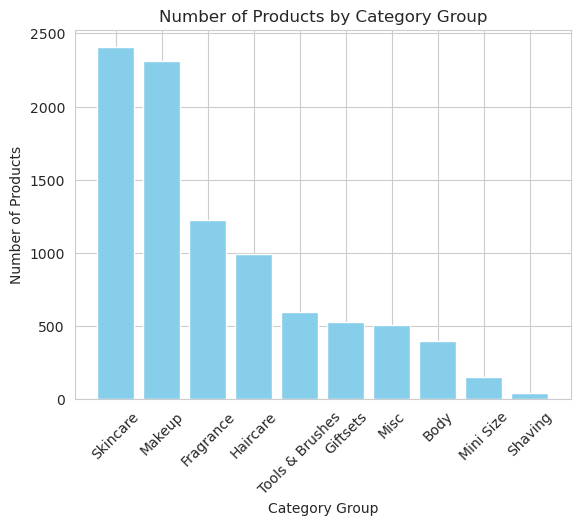

In [16]:
# Count the number of products in each category group
category_group_counts = data['category_group'].value_counts()

# Create a bar chart of the category group counts using matplotlib
plt.bar(category_group_counts.index, category_group_counts.values, color='skyblue')

# Customize the plot
plt.title('Number of Products by Category Group')
plt.xlabel('Category Group')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)

# Show the plot
plt.show()

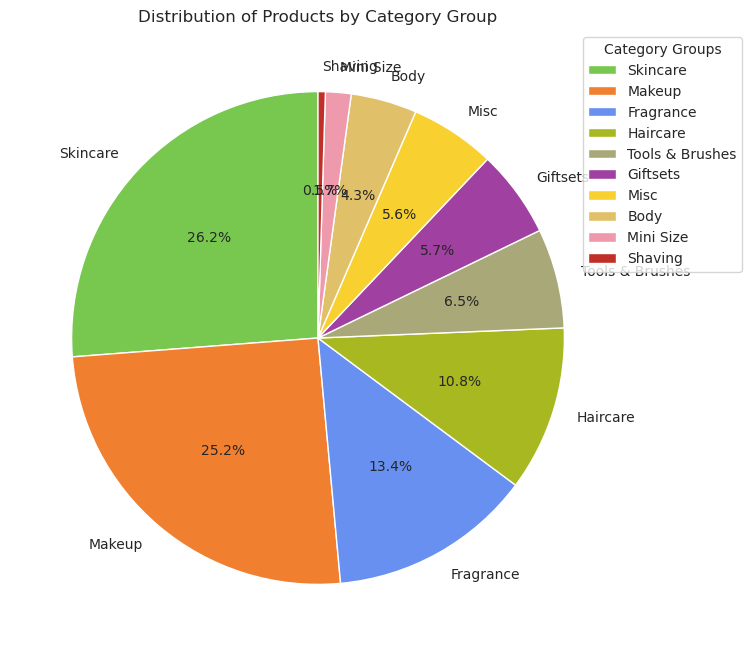

In [17]:
# Count the number of products in each category group
category_group_counts = data['category_group'].value_counts()

# Define color palette for the pie chart
colors = ['#78C850', '#F08030', '#6890F0', '#A8B820', '#A8A878', '#A040A0', '#F8D030', '#E0C068', '#EE99AC', '#C03028']

# Create a pie chart of the category group counts using matplotlib
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(category_group_counts.values, labels=category_group_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)

# Add a title to the plot
ax.set_title("Distribution of Products by Category Group")

# Add a legend to the plot
ax.legend(title="Category Groups", loc="upper right", bbox_to_anchor=(1.2, 1))

# Show the plot
plt.show()

The most popular categories on Sephora are Skincare, Makeup and Fragrance.

### 6. Sephora Brand vs Others

In [18]:
data.brand.value_counts()

SEPHORA COLLECTION    496
CLINIQUE              234
tarte                 170
TOM FORD              161
Dior                  145
                     ... 
SHHHOWERCAP             1
Taste Beauty            1
bkr                     1
Cocofloss               1
DL.MD                   1
Name: brand, Length: 324, dtype: int64

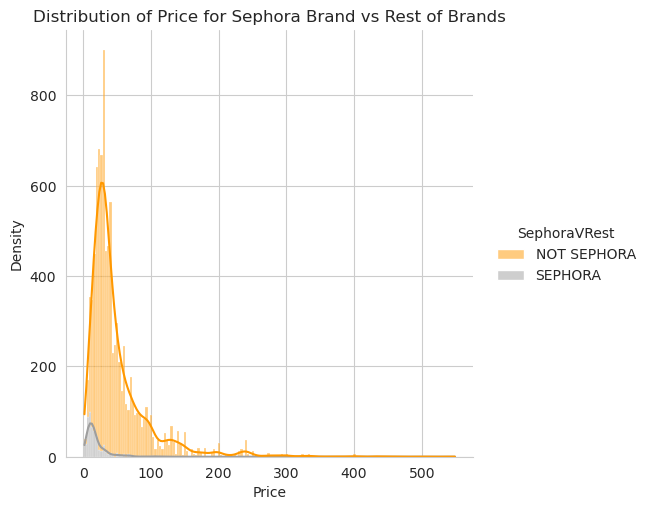

In [19]:
# Create a new column 'SephoraVRest' with 1 for 'Sephora Brand' and 0 for any other brand
data['SephoraVRest'] = data['brand'].apply(lambda x: "SEPHORA" if x == 'SEPHORA COLLECTION' else "NOT SEPHORA")

# Create a distribution plot of price for Sephora brand versus rest of the brands
sns.displot(data=data, x='price', hue='SephoraVRest', kde=True, multiple='stack', palette=['#ff9800', '#9e9e9e'])

# Add plot title, axis titles, and a background grid
plt.title('Distribution of Price for Sephora Brand vs Rest of Brands')
plt.xlabel('Price')
plt.ylabel('Density')
plt.grid(True)

# Show the plot
plt.show()

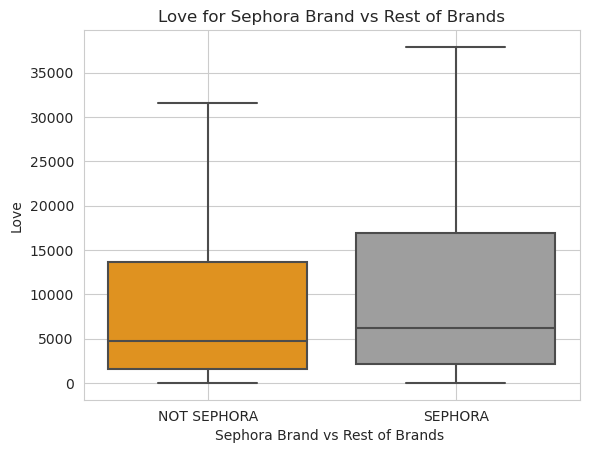

In [20]:
sns.boxplot(data=data, x='SephoraVRest', y='love', showfliers = False, palette=['#ff9800', '#9e9e9e'])

# Add plot title, axis titles, and a background grid
plt.title('Love for Sephora Brand vs Rest of Brands')
plt.xlabel('Sephora Brand vs Rest of Brands ')
plt.ylabel('Love')
plt.grid(True)

# Show the plot
plt.show()

Overall the sephora products are more loved and less expensive.

### 7. Relationship between product category and price 
We create a box plot of "category" versus "price" to see if there are any significant differences in price across different categories of products. Again we will use previously created feature 'category_group' for this analysis.

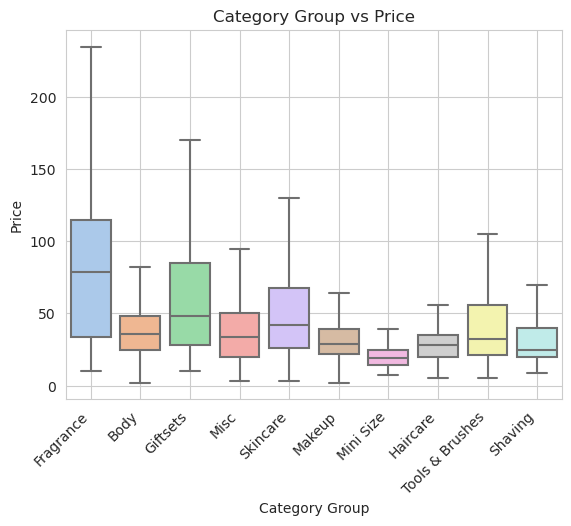

In [21]:
# Create a box plot of 'category_group' versus 'price'
sns.boxplot(data=data, x='category_group', y='price', palette='pastel', showfliers = False)

# Add plot title, axis titles, and a background grid
plt.title('Category Group vs Price')
plt.xlabel('Category Group')
plt.ylabel('Price')
plt.grid(True)

# Rotate the x-axis labels to make them easier to read
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### 8. Marketing Analysis
The MarketingFlags_content column provides information about the marketing strategy used by the company for each product. This information can be used for advanced EDA to gain insights about the sales and popularity of products with different marketing strategies. 

In [22]:
data.MarketingFlags_content.unique()

array(['online only', 'exclusive · online only', '0',
       'limited edition · exclusive · online only',
       'limited edition · online only', 'exclusive',
       'limited edition · exclusive', 'limited edition',
       'limited time offer',
       'limited time offer · limited edition · exclusive'], dtype=object)

In [23]:
data.loc[data['MarketingFlags_content']=='0','MarketingFlags_content'] = 'No Flag'

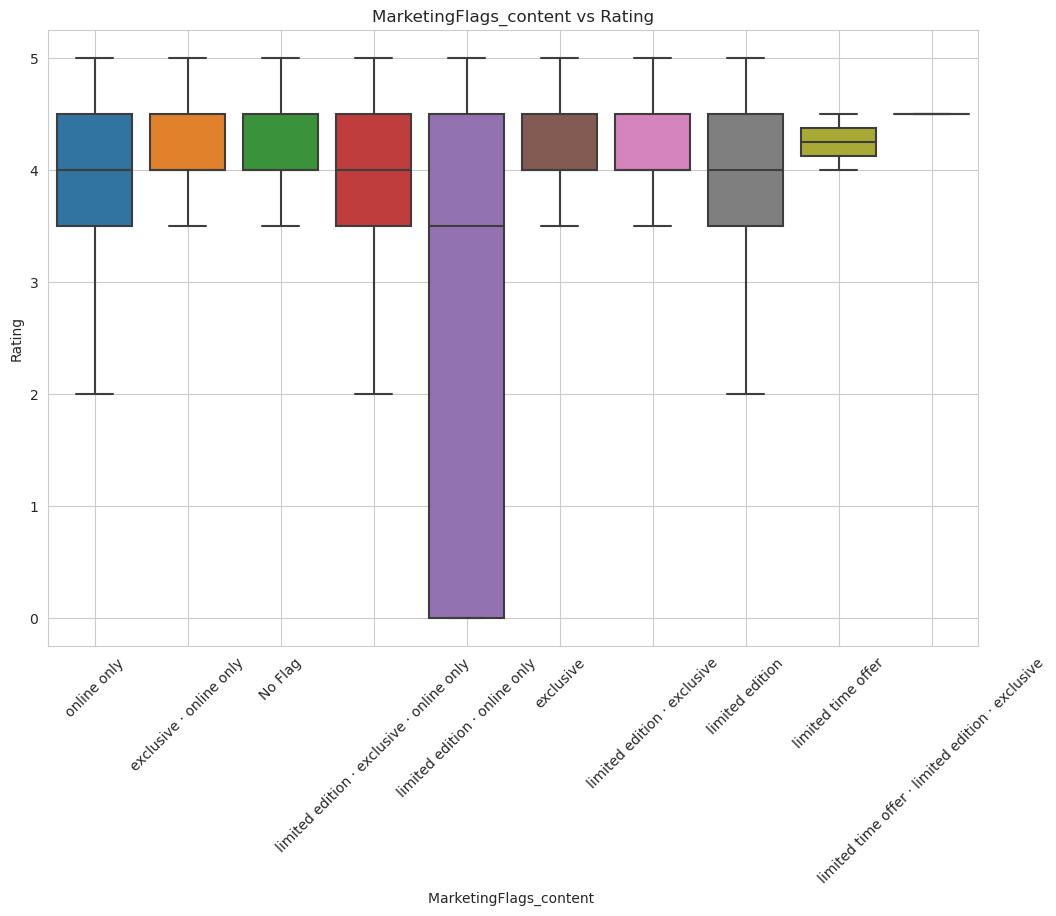

In [24]:
# create a plot
fig, ax = plt.subplots()
sns.boxplot(x="MarketingFlags_content", y="rating", data=data,showfliers = False)
# Add plot title, axis titles, and a background grid
plt.title('MarketingFlags_content vs Rating')
plt.xlabel('MarketingFlags_content ')
plt.ylabel('Rating')
plt.grid(True)
plt.xticks(rotation=45)

# set the figure size
fig.set_size_inches(12, 8) # set the width to 12 inches and height to 8 inches

plt.show()

In [25]:
marketing_flag_fields = ['online_only', 'exclusive',   'limited_edition', 'limited_time_offer',]

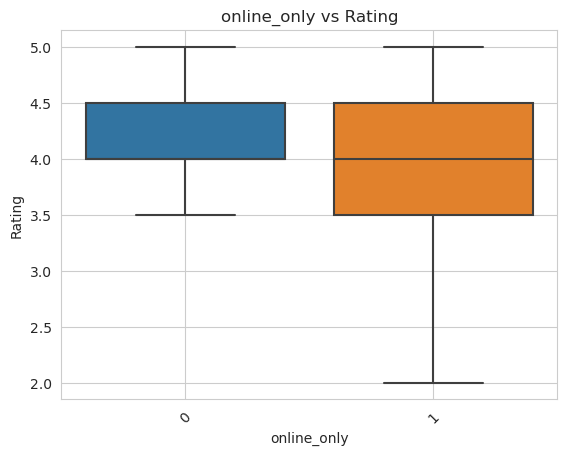

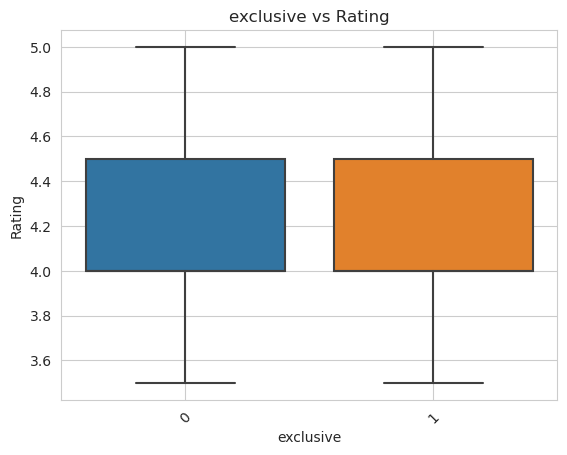

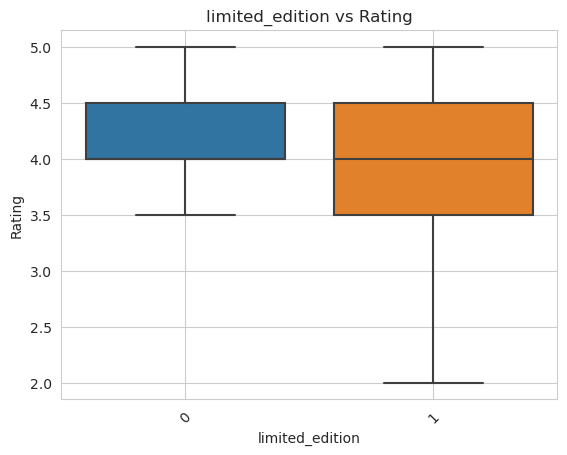

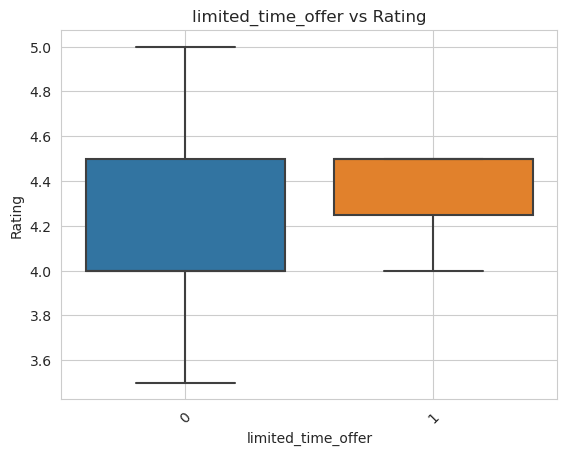

In [26]:
for field in marketing_flag_fields:
    # create a plot
    fig, ax = plt.subplots()
    sns.boxplot(x=field, y="rating", data=data,showfliers = False)
    # Add plot title, axis titles, and a background grid
    plt.title(field+' vs Rating')
    plt.xlabel(field)
    plt.ylabel('Rating')
    plt.grid(True)
    plt.xticks(rotation=45)

    # set the figure size
    #fig.set_size_inches(12, 8) # set the width to 12 inches and height to 8 inches

    plt.show()

These marketing stratergies, limit the ratings of the products

> ### Analyze the frequency of different marketing flags across the products to identify the most commonly used marketing strategies.

In [27]:
marketing_flags = data['MarketingFlags_content'].value_counts()
print(marketing_flags)

No Flag                                             4786
exclusive                                           1692
online only                                         1528
exclusive · online only                              318
limited edition · exclusive                          297
limited edition                                      237
limited edition · online only                        188
limited edition · exclusive · online only            119
limited time offer                                     2
limited time offer · limited edition · exclusive       1
Name: MarketingFlags_content, dtype: int64


The most commonly used marketing stratergies are 'exclusive' and 'online only'. I would like to have sales data to analyze this against sales.

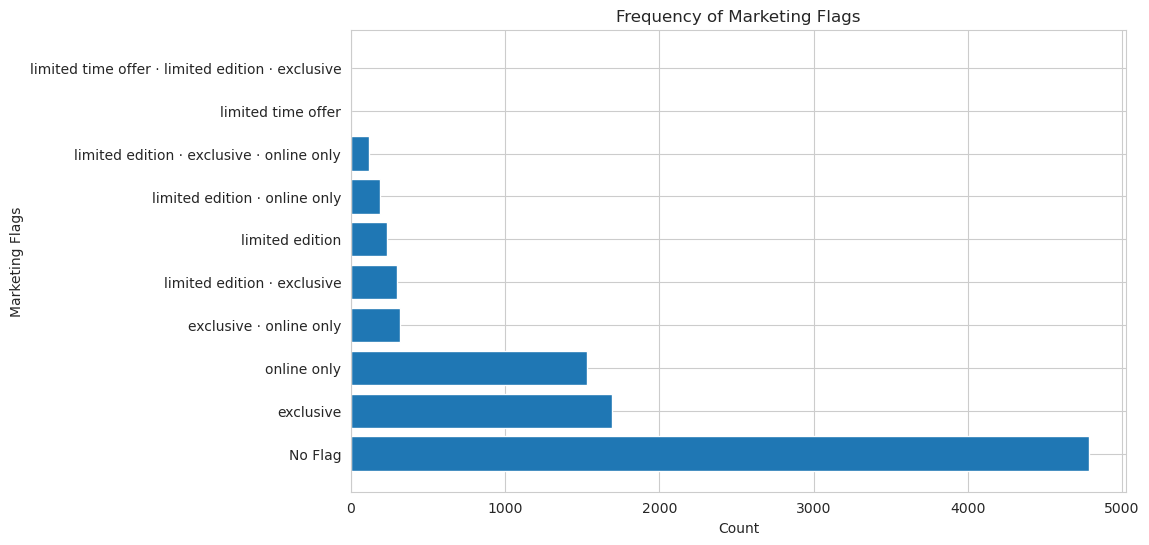

In [28]:
plt.figure(figsize=(10,6))
plt.barh(marketing_flags.index, marketing_flags.values)
plt.title("Frequency of Marketing Flags")
plt.xlabel("Count")
plt.ylabel("Marketing Flags")
plt.show()

> ### Explore marketing stratergy against Price

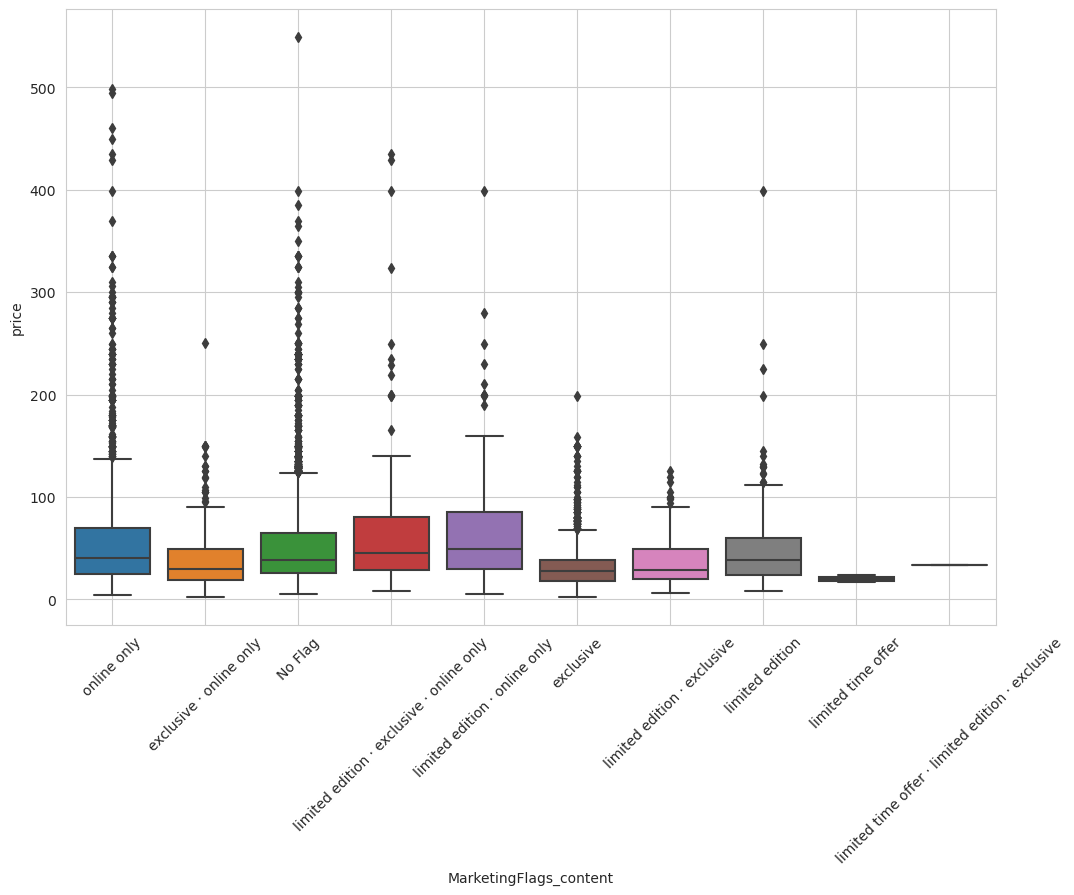

In [29]:
fig, ax = plt.subplots()
sns.boxplot(x="MarketingFlags_content", y="price", data=data)
plt.grid(True)
plt.xticks(rotation=45)

# set the figure size
fig.set_size_inches(12, 8) # set the width to 12 inches and height to 8 inches

plt.show()

The online only products have more outliers.

One possible reason for this could be that these products are exclusive to the online store and are not available in physical stores, which can drive up their prices.

However, it is also possible that some of the prices in the "online only" category are simply erroneous or outliers due to other reasons, such as errors in data collection or data entry. 

> ### Compare price for products that do have a flag against those that dont

In [30]:
data['MarketingFlags_content'].unique()

array(['online only', 'exclusive · online only', 'No Flag',
       'limited edition · exclusive · online only',
       'limited edition · online only', 'exclusive',
       'limited edition · exclusive', 'limited edition',
       'limited time offer',
       'limited time offer · limited edition · exclusive'], dtype=object)

In [31]:
# Create a new column 'SephoraVRest' with 1 for 'Sephora Brand' and 0 for any other brand
data['Have_Flag'] = data['MarketingFlags_content'].apply(lambda x: "No Marketing Stratergy" if x == 'No Flag' else "Marketing Stratergy")


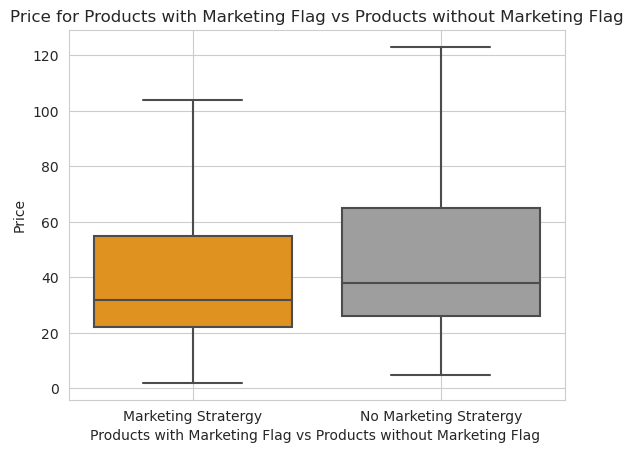

In [32]:
sns.boxplot(data=data, x='Have_Flag', y='price', showfliers = False, palette=['#ff9800', '#9e9e9e'])

# Add plot title, axis titles, and a background grid
plt.title('Price for Products with Marketing Flag vs Products without Marketing Flag')
plt.xlabel('Products with Marketing Flag vs Products without Marketing Flag ')
plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.show()

Boxplot shows that products with marketing flags have lower prices compared to products without marketing flags, it may suggest that the marketing strategy is targeted towards lower-priced products. However, it's important to note that this conclusion may not hold true for all cases and it's necessary to consider other factors such as product category, brand, and target audience.

In [33]:
# calculate mean and median prices for each group
marketing_mean = data[data['Have_Flag'] == 'Marketing Stratergy']['price'].mean()
no_marketing_mean = data[data['Have_Flag'] == 'No Marketing Stratergy']['price'].mean()
marketing_median = np.median(data[data['Have_Flag'] == 'Marketing Stratergy']['price'])
no_marketing_median = np.median(data[data['Have_Flag'] == 'No Marketing Stratergy']['price'])

In [34]:
from scipy.stats import ttest_ind

In [35]:
# perform t-test to compare means
t, p = ttest_ind(data[data['Have_Flag'] == 'Marketing Stratergy']['price'], 
                 data[data['Have_Flag'] == 'No Marketing Stratergy']['price'], 
                 equal_var=False)
print("Mean price for products with marketing flags:", marketing_mean)
print("Mean price for products without marketing flags:", no_marketing_mean)
print("Median price for products with marketing flags:", marketing_median)
print("Median price for products without marketing flags:", no_marketing_median)
print("t-statistic:", t)
print("p-value:", p)

Mean price for products with marketing flags: 47.25772021907805
Mean price for products without marketing flags: 52.6319327204346
Median price for products with marketing flags: 32.0
Median price for products without marketing flags: 38.0
t-statistic: -5.443343843325913
p-value: 5.36702564487913e-08


Based on the results , it seems that products with marketing flags have a lower mean and median price compared to products without marketing flags. The t-test also indicates that this difference in means is statistically significant, with a t-statistic of -5.44 and a very low p-value of 5.37e-08. This suggests that there is strong evidence to support the claim that there is a difference in pricing strategy between products with marketing flags and those without. Products with marketing flags are generally priced lower than those without marketing flags.

However, further investigation and analysis would be needed to establish causality.A rigorous approach, such as a randomized controlled trial (RCT), where participants are randomly assigned to groups with or without a certain marketing strategy, would allow us to determine the causal effect of the marketing strategy on the pricing of products. However, conducting an RCT in the context of marketing strategies can be challenging and costly, so other approaches such as natural experiments or quasi-experimental designs may also be used to establish causality. 

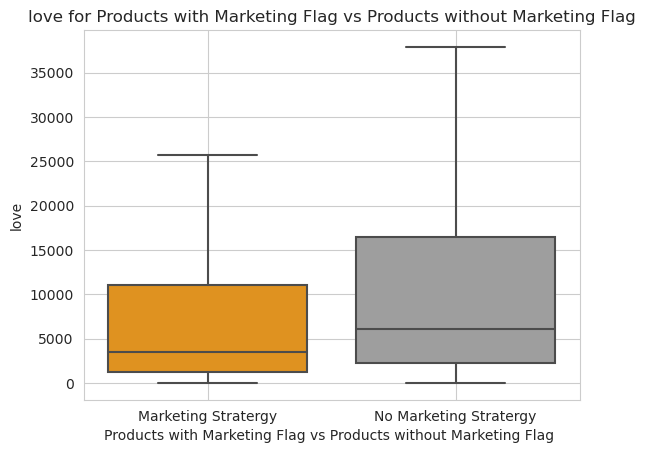

In [36]:
sns.boxplot(data=data, x='Have_Flag', y='love', showfliers = False, palette=['#ff9800', '#9e9e9e'])

# Add plot title, axis titles, and a background grid
plt.title('love for Products with Marketing Flag vs Products without Marketing Flag')
plt.xlabel('Products with Marketing Flag vs Products without Marketing Flag ')
plt.ylabel('love')
plt.grid(True)

# Show the plot
plt.show()

There is less variation in the love scores for products with marketing flags,also, The love scores tend to be lower for products with marketing flags. However, without further analysis, it is difficult to draw any definitive conclusions about the relationship between marketing flags and love scores. Many factors affect love scores such as product category or customer demographics. 

In [37]:
marketing_mean = data[data['Have_Flag'] == 'Marketing Stratergy']['love'].mean()
no_marketing_mean = data[data['Have_Flag'] == 'No Marketing Stratergy']['love'].mean()
marketing_median = np.median(data[data['Have_Flag'] == 'Marketing Stratergy']['love'])
no_marketing_median = np.median(data[data['Have_Flag'] == 'No Marketing Stratergy']['love'])

# perform t-test to compare means
t, p = ttest_ind(data[data['Have_Flag'] == 'Marketing Stratergy']['love'], 
                 data[data['Have_Flag'] == 'No Marketing Stratergy']['love'], 
                 equal_var=False)
print("Mean love for products with marketing flags:", marketing_mean)
print("Mean love for products without marketing flags:", no_marketing_mean)
print("Median love for products with marketing flags:", marketing_median)
print("Median love for products without marketing flags:", no_marketing_median)
print("t-statistic:", t)
print("p-value:", p)

Mean love for products with marketing flags: 13730.506846188955
Mean love for products without marketing flags: 18611.57271207689
Median love for products with marketing flags: 3500.0
Median love for products without marketing flags: 6100.0
t-statistic: -5.511195160828562
p-value: 3.660643550527605e-08


Based on the results, it appears that products without marketing flags have a higher mean and median love value compared to products with marketing flags. The t-statistic indicates a significant difference between the two groups, and the p-value suggests that the likelihood of observing such a difference by chance is extremely low.

However, as with the analysis of price and marketing flags, this analysis also cannot establish causality. It is possible that products without marketing flags have higher love values for reasons unrelated to the lack of marketing flags. To establish causality, a more rigorous experimental design may be necessary, such as randomly assigning products to have or not have marketing flags and measuring the effects on love values.

<b>These findings suggest that companies may be using marketing flags as a strategy to promote products that are lower in price, but may not be as attractive to customers based on their love score.

However, other factors such as the product category, brand, and marketing budget may also impact the effectiveness of marketing flags as a strategy.

> ### analyze the customer reviews and ratings of products with different marketing flags

In [38]:
data[['name','rating','number_of_reviews']]

,name,rating,number_of_reviews
0,Blu Mediterraneo MINIATURE Set,4.0,4
1,Colonia,4.5,76
2,Arancia di Capri,4.5,26
3,Mirto di Panarea,4.5,23
4,Colonia Miniature Set,3.5,2
...,...,...,...
9163,The Rose Gold Mask,2.0,15
9164,Give Me Some Sugar Colorful Gloss Balm Set,0.0,0
9165,Weekend Warrior Tone Up Cream,0.0,0
9166,Gift Card,5.0,46


To factor in the number of reviews, we can calculate the weighted average rating for each marketing flag category. The weighted average takes into account the number of reviews for each product in the calculation of the average rating. We can weight each product's rating by the number of reviews it has received and then take the average of these weighted ratings for each marketing flag category.

In [39]:
# Assuming the dataframe containing the data is named 'df'
avg_rating_by_flag = data.groupby('MarketingFlags_content')['rating'].mean()

# Print the results
print(avg_rating_by_flag)

MarketingFlags_content
No Flag                                             4.094547
exclusive                                           4.028369
exclusive · online only                             3.926101
limited edition                                     3.734177
limited edition · exclusive                         3.914141
limited edition · exclusive · online only           3.735294
limited edition · online only                       2.739362
limited time offer                                  4.250000
limited time offer · limited edition · exclusive    4.500000
online only                                         3.860929
Name: rating, dtype: float64


In [40]:
# Calculate the weighted average rating for each marketing flag category
weighted_avg_rating = data.groupby('MarketingFlags_content').apply(lambda x: np.average(x['rating'], weights=x['number_of_reviews']))

# Calculate the number of reviews for each marketing flag category
num_reviews = data.groupby('MarketingFlags_content')['number_of_reviews'].sum()

# Combine the weighted average rating and number of reviews into a DataFrame
result = pd.DataFrame({'Weighted Average Rating': weighted_avg_rating, 'Number of Reviews': num_reviews})

# Sort the DataFrame by the weighted average rating in descending order
result = result.sort_values(by='Weighted Average Rating', ascending=False)

# Print the result
print(result)

                                                  Weighted Average Rating  \
MarketingFlags_content                                                      
limited time offer · limited edition · exclusive                 4.500000   
limited edition                                                  4.398937   
limited edition · exclusive                                      4.316965   
online only                                                      4.267643   
exclusive · online only                                          4.266570   
No Flag                                                          4.261559   
limited time offer                                               4.231629   
limited edition · exclusive · online only                        4.212829   
exclusive                                                        4.200081   
limited edition · online only                                    4.071982   

                                                  Number of Reviews  
Marke

### Ingredients Analysis

In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

In [47]:
print("Ingredient not available for ",data[data['ingredients']=='unknown'].shape[0]/data.shape[0]*100, "% products")

Ingredient not available for  17.779232111692846 % products


Will explore ingredients later on.

### Explore skewness of features

In [50]:
selected_feat=['id', 'brand', 'number_of_reviews', 'love', 'price', 'value_price', 
       'MarketingFlags', 'MarketingFlags_content','online_only', 'exclusive',
       'limited_edition', 'limited_time_offer', 'category_group',
       'SephoraVRest']

In [51]:
from scipy.stats import skew

# assuming your data is stored in a pandas dataframe called 'df'
numeric_cols = data[selected_feat].select_dtypes(include=['float64', 'int64']).columns
skew_vals = data[numeric_cols].apply(lambda x: skew(x.dropna()))
skew_vals = skew_vals[abs(skew_vals) > 0.5]  # consider only highly skewed features

print(skew_vals)

id                    -2.025865
number_of_reviews      9.784112
love                   9.704153
price                  3.172289
value_price            3.142461
online_only            1.251063
exclusive              1.066555
limited_edition        2.826569
limited_time_offer    55.253962
dtype: float64


In [60]:
transformed_data = pd.DataFrame()
transformed_data['number_of_reviews'] = np.log(data['number_of_reviews'])
transformed_data['love'] = np.log(data['love'])
transformed_data['price'] = np.log(data['price'])
transformed_data['value_price'] = np.log(data['value_price'])

In [58]:
from scipy.stats import probplot

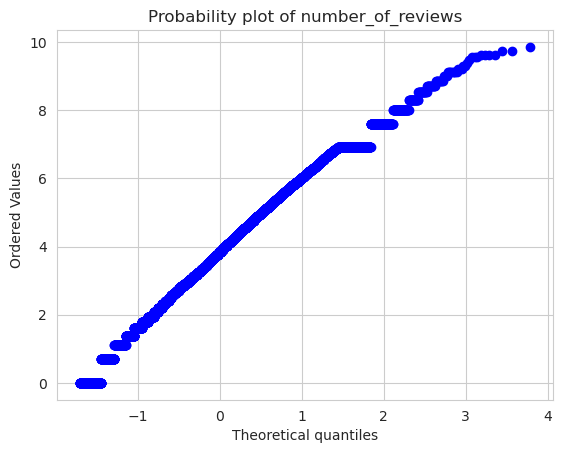

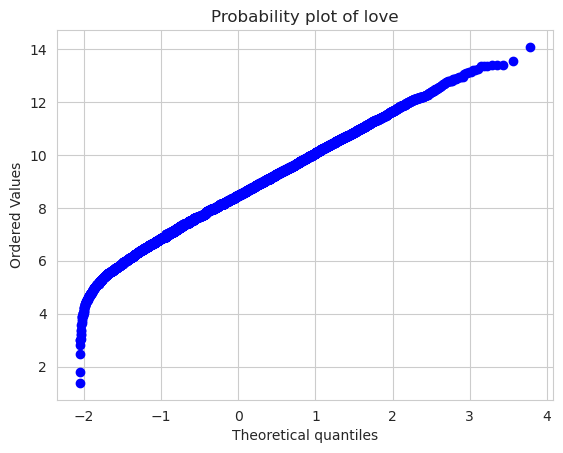

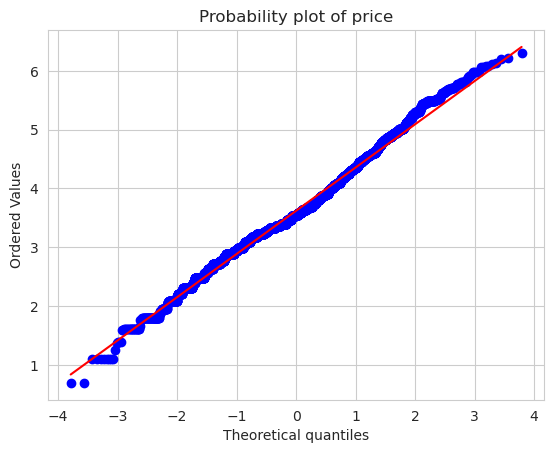

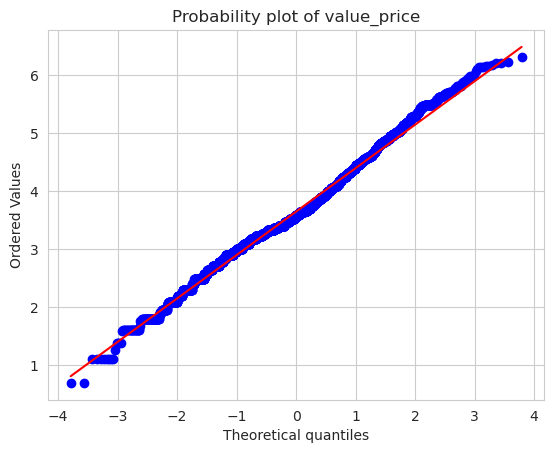

In [62]:
# probability plot : he x-axis representing theoretical quantiles from a normal distribution and the y-axis representing the corresponding quantiles from the actual data. 
for col in ["number_of_reviews", "love", "price", "value_price"]:
    probplot(transformed_data[col], dist='norm', plot=plt)
    plt.title(f"Probability plot of {col}")
    plt.show()